In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import plotly as ply

# Task 1

## Get all concerned CSVs

In [4]:
is_df = pd.read_csv('./Aaryan/Aaryan/Alexnet/alexnet_cycles_googleis.csv')
os_df = pd.read_csv('./Aaryan/Aaryan/Alexnet/alexnet_cycles_googleos.csv')
ws_df = pd.read_csv('./Aaryan/Aaryan/Alexnet/alexnet_cycles_googlews.csv')

In [5]:
print(is_df.head())

   Layer  \tCycles  \t% Utilization  Unnamed: 3
0  Conv1     16824        73.904094         NaN
1  Conv2   1595440        95.550308         NaN
2  Conv3      9144        47.265625         NaN
3  Conv4     13968        45.979762         NaN
4  Conv5     12176        46.038955         NaN


In [6]:
is_df = is_df.rename(columns={'\tCycles': 'Cycles_is', '\t% Utilization': 'Utilization_is'})
is_df = is_df.drop('Unnamed: 3', axis=1)
os_df = os_df.rename(columns={'\tCycles': 'Cycles_os', '\t% Utilization': 'Utilization_os'})
os_df = os_df.drop('Unnamed: 3', axis=1)
ws_df = ws_df.rename(columns={'\tCycles': 'Cycles_ws', '\t% Utilization': 'Utilization_ws'})
ws_df = ws_df.drop('Unnamed: 3', axis=1)

In [7]:
alexdf = pd.merge(is_df, os_df, on='Layer', how='outer')
alexdf = pd.merge(alexdf, ws_df, on='Layer', how='outer')
print(alexdf)

   Layer  Cycles_is  Utilization_is  Cycles_os  Utilization_os  Cycles_ws  \
0  Conv1      16824       73.904094       4551       34.697112       6750   
1  Conv2    1595440       95.550308     386904       99.895889     419450   
2  Conv3       9144       47.265625       4736       34.290662      14850   
3  Conv4      13968       45.979762       7040       34.669880      22588   
4  Conv5      12176       46.038955       3832       42.915271      12190   
5    FC1     165888        0.390625     147712        0.389613     442944   
6    FC2      24576        0.390625      16640        0.381645      49216   
7    FC3       2088        0.390625       1034        0.015059       2092   

   Utilization_ws  
0       27.068707  
1       93.792913  
2       76.939394  
3       75.023242  
4       97.403610  
5      100.000000  
6      100.000000  
7        3.906250  


In [8]:
layer_names = ["Conv1_IS", "Conv1_OS", "Conv1_WS", "Conv2_IS", "Conv2_OS", "Conv2_WS", "Conv3_IS", "Conv3_OS", "Conv3_WS", "Conv4_IS", "Conv4_OS", "Conv4_WS", "Conv5_IS", "Conv5_OS", "Conv5_WS", "FC6_IS", "FC6_OS", "FC6_WS", "FC7_IS", "FC7_OS", "FC7_WS", "FC8_IS", "FC8_OS", "FC8_WS",]
cycles_is = np.array([16824, 106860, 29790, 13968, 12176])
cycles_os = np.array([4551, 26696, 13952, 7040, 3832])
cycles_ws = np.array([6750, 33370, 23922, 22588, 12190])
utilization_is = np.array([73.904094, 89.743791, 82.989048, 45.979762, 46.038955])
utilization_os = np.array([34.697112, 91.320705, 60.415008, 34.669880, 42.915271])
utilization_ws = np.array([27.068707, 94.289407, 76.203913, 75.023242, 97.403610])

In [9]:
cycles = np.array([])
utilization = np.array([])
ct = 0
for i in range(0, 8):
    for j in range(0, 3):
        if ct%3 == 0:
            cycles = np.append(cycles, alexdf.loc[i, 'Cycles_is'])
            utilization = np.append(utilization, alexdf.loc[i, 'Utilization_is'])
        if ct%3 == 1:
            cycles = np.append(cycles, alexdf.loc[i, 'Cycles_os'])
            utilization = np.append(utilization, alexdf.loc[i, 'Utilization_os'])
        if ct%3 == 2:
            cycles = np.append(cycles, alexdf.loc[i, 'Cycles_ws'])
            utilization = np.append(utilization, alexdf.loc[i, 'Utilization_ws'])
        ct+=1
print(cycles)
print(utilization)

[1.68240e+04 4.55100e+03 6.75000e+03 1.59544e+06 3.86904e+05 4.19450e+05
 9.14400e+03 4.73600e+03 1.48500e+04 1.39680e+04 7.04000e+03 2.25880e+04
 1.21760e+04 3.83200e+03 1.21900e+04 1.65888e+05 1.47712e+05 4.42944e+05
 2.45760e+04 1.66400e+04 4.92160e+04 2.08800e+03 1.03400e+03 2.09200e+03]
[7.39040935e+01 3.46971122e+01 2.70687066e+01 9.55503079e+01
 9.98958886e+01 9.37929133e+01 4.72656250e+01 3.42906619e+01
 7.69393939e+01 4.59797618e+01 3.46698798e+01 7.50232424e+01
 4.60389547e+01 4.29152706e+01 9.74036095e+01 3.90625000e-01
 3.89613470e-01 1.00000000e+02 3.90625000e-01 3.81645250e-01
 1.00000000e+02 3.90625000e-01 1.50593760e-02 3.90625000e+00]


C:\Users\Aaryan Agarwal\AppData\Local\Temp\ipykernel_11808\1186704605.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(layer_names, rotation=90, ha='center')


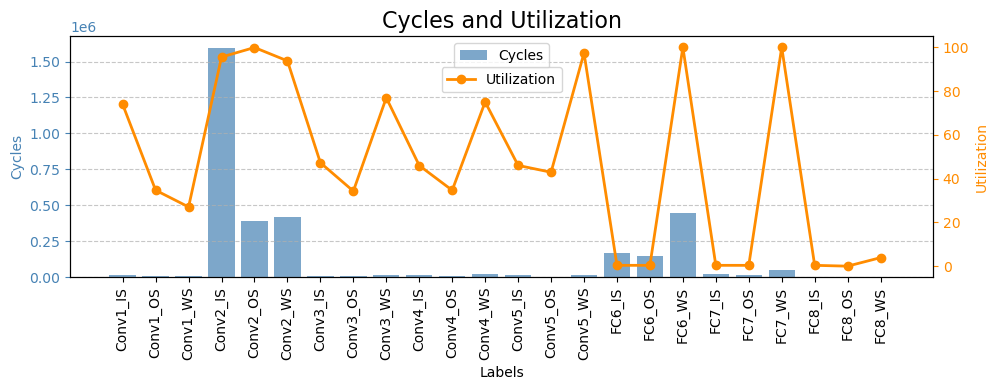

In [10]:
# Create a figure and axis with a wider figure size
fig, ax1 = plt.subplots(figsize=(10, 4))

# Bar graph for cycles
ax1.bar(layer_names, cycles, color='steelblue', alpha=0.7, label='Cycles')
ax1.set_xlabel('Labels')
ax1.set_ylabel('Cycles', color='steelblue')
ax1.tick_params('y', colors='steelblue')

# Turn x-labels by 90 degrees
ax1.set_xticklabels(layer_names, rotation=90, ha='center')

# Create a secondary y-axis for utilization
ax2 = ax1.twinx()
ax2.plot(layer_names, utilization, color='darkorange', marker='o', label='Utilization', linewidth=2)
ax2.set_ylabel('Utilization', color='darkorange')
ax2.tick_params('y', colors='darkorange')

# Beautify plot
ax1.set_title('Cycles and Utilization', fontsize=16)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Customize legend
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0))
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 0.9))

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

In [35]:
# List of CSV files
csv_files = [
    "./Aaryan/Aaryan/Alexnet/alexnet_cycles_design1.csv",
    "./Aaryan/Aaryan/Alexnet/alexnet_cycles_design2.csv",
    "./Aaryan/Aaryan/Alexnet/alexnet_cycles_eyeriss.csv",
    "./Aaryan/Aaryan/Alexnet/alexnet_cycles_googleos.csv",
    "./Aaryan/Aaryan/Alexnet/FasterRCNN_cycles_design1.csv",
    "./Aaryan/Aaryan/Alexnet/FasterRCNN_cycles_design2.csv",
    "./Aaryan/Aaryan/Alexnet/FasterRCNN_cycles_eyeriss.csv",
    "./Aaryan/Aaryan/Alexnet/FasterRCNN_cycles_googleos.csv",
    "./Aaryan/Aaryan/Alexnet/Googlenet_cycles_design1.csv",
    "./Aaryan/Aaryan/Alexnet/Googlenet_cycles_design2.csv",
    "./Aaryan/Aaryan/Alexnet/Googlenet_cycles_eyeriss.csv",
    "./Aaryan/Aaryan/Alexnet/Googlenet_cycles_googleos.csv",
    "./Aaryan/Aaryan/Alexnet/mobilenet_cycles_design1.csv",
    "./Aaryan/Aaryan/Alexnet/mobilenet_cycles_design2.csv",
    "./Aaryan/Aaryan/Alexnet/mobilenet_cycles_eyeriss.csv",
    "./Aaryan/Aaryan/Alexnet/mobilenet_cycles_googleos.csv",
    "./Aaryan/Aaryan/Alexnet/Resnet_cycles_design1.csv",
    "./Aaryan/Aaryan/Alexnet/Resnet_cycles_design2.csv",
    "./Aaryan/Aaryan/Alexnet/Resnet_cycles_eyeriss.csv",
    "./Aaryan/Aaryan/Alexnet/Resnet_cycles_googleos.csv",
    "./Aaryan/Aaryan/Alexnet/yolotiny_cycles_design1.csv",
    "./Aaryan/Aaryan/Alexnet/yolotiny_cycles_design2.csv",
    "./Aaryan/Aaryan/Alexnet/yolotiny_cycles_eyeriss.csv",
    "./Aaryan/Aaryan/Alexnet/yolotiny_cycles_googleos.csv"
]

# Dictionary to store DataFrames
dataframes = {}

# Read each CSV file into a DataFrame and store it in the dictionary
for file in csv_files:
    # Extracting the model name from the file name
    
#     model_name = file.split('_')[0]
#     model_name += '_'
#     model_name += file.split('_')[1]
#     model_name += '_'
#     model_name += file.split('_')[2]
    model_name=(file.split('/')[4]).split('.')[0]
    # Reading CSV file into a DataFrame
    df = pd.read_csv(file)
    df = df.rename(columns={'\tCycles': 'Cycles', '\t% Utilization': 'Utilization_is'})
    df = df.drop('Unnamed: 3', axis=1)
    # Storing the DataFrame in the dictionary
    dataframes[model_name] = df['Cycles'].sum()
dataframes
# dataframes["alexnet_design2"]  # Accessing the DataFrame for alexnet_design2_os.csv

{'alexnet_cycles_design1': 26528833,
 'alexnet_cycles_design2': 6969373,
 'alexnet_cycles_eyeriss': 162761937,
 'alexnet_cycles_googleos': 572449,
 'FasterRCNN_cycles_design1': 3715357,
 'FasterRCNN_cycles_design2': 1029112,
 'FasterRCNN_cycles_eyeriss': 22302935,
 'FasterRCNN_cycles_googleos': 145318,
 'Googlenet_cycles_design1': 1468034,
 'Googlenet_cycles_design2': 435517,
 'Googlenet_cycles_eyeriss': 8753345,
 'Googlenet_cycles_googleos': 92603,
 'mobilenet_cycles_design1': 1100576,
 'mobilenet_cycles_design2': 444538,
 'mobilenet_cycles_eyeriss': 4840282,
 'mobilenet_cycles_googleos': 134310,
 'Resnet_cycles_design1': 1185983,
 'Resnet_cycles_design2': 462363,
 'Resnet_cycles_eyeriss': 5528327,
 'Resnet_cycles_googleos': 146502,
 'yolotiny_cycles_design1': 2080397,
 'yolotiny_cycles_design2': 734039,
 'yolotiny_cycles_eyeriss': 12545222,
 'yolotiny_cycles_googleos': 297163}

In [36]:
print(dataframes)

{'alexnet_cycles_design1': 26528833, 'alexnet_cycles_design2': 6969373, 'alexnet_cycles_eyeriss': 162761937, 'alexnet_cycles_googleos': 572449, 'FasterRCNN_cycles_design1': 3715357, 'FasterRCNN_cycles_design2': 1029112, 'FasterRCNN_cycles_eyeriss': 22302935, 'FasterRCNN_cycles_googleos': 145318, 'Googlenet_cycles_design1': 1468034, 'Googlenet_cycles_design2': 435517, 'Googlenet_cycles_eyeriss': 8753345, 'Googlenet_cycles_googleos': 92603, 'mobilenet_cycles_design1': 1100576, 'mobilenet_cycles_design2': 444538, 'mobilenet_cycles_eyeriss': 4840282, 'mobilenet_cycles_googleos': 134310, 'Resnet_cycles_design1': 1185983, 'Resnet_cycles_design2': 462363, 'Resnet_cycles_eyeriss': 5528327, 'Resnet_cycles_googleos': 146502, 'yolotiny_cycles_design1': 2080397, 'yolotiny_cycles_design2': 734039, 'yolotiny_cycles_eyeriss': 12545222, 'yolotiny_cycles_googleos': 297163}


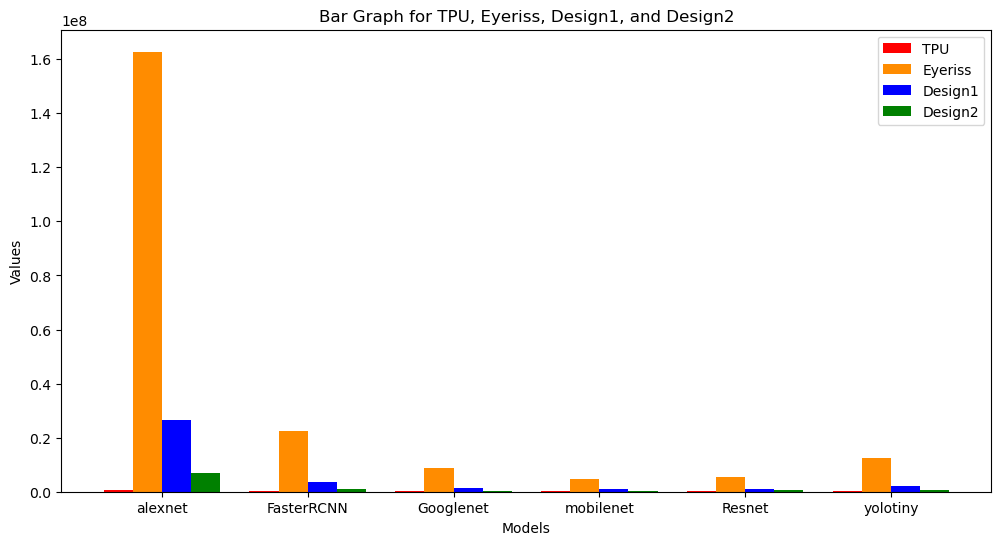

In [40]:
# Extracting dataframe for each label
labels = ['alexnet', 'FasterRCNN', 'Googlenet', 'mobilenet', 'Resnet', 'yolotiny']
tpu_values = [dataframes[f'{label}_cycles_googleos'] for label in labels]
eyeriss_values = [dataframes[f'{label}_cycles_eyeriss'] for label in labels]
design1_values = [dataframes[f'{label}_cycles_design1'] for label in labels]
design2_values = [dataframes[f'{label}_cycles_design2'] for label in labels]

# Set the figsize
plt.figure(figsize=(12, 6))

# Plotting the bar graph
bar_width = 0.2
index = range(len(labels))
plt.bar(index, tpu_values, width=bar_width, label='TPU', color = 'r')
plt.bar([i + bar_width for i in index], eyeriss_values, width=bar_width, label='Eyeriss', color = 'darkorange')
plt.bar([i + 2 * bar_width for i in index], design1_values, width=bar_width, label='Design1', color = 'b')
plt.bar([i + 3 * bar_width for i in index], design2_values, width=bar_width, label='Design2', color = 'green')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Bar Graph for TPU, Eyeriss, Design1, and Design2')
plt.xticks([i + 1.5 * bar_width for i in index], labels)
plt.legend()

# Adjusting y-axis range for TPU values
#plt.ylim(0, max(tpu_values) + max(tpu_values) * 20)  # You can adjust the multiplier for better visibility

# Show the plot
plt.show()